# Data Exploration: Prosper Loan Dataset

## By Jermaine Varnicker
Prosper is a lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

the dataset contains a total of 113936



## Preliminary Wrangling


In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
#load the dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Univariate Exploration

>  We will being our analysis by exloring the variable 'BorrowerRate'. 

In [16]:
# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {
    'EmploymentStatus': [
        'Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
        'Part-time', 'Not employed', 'Retired'
    ],
    'IncomeRange': [
        '$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
        'Not displayed', '$1-24,999', 'Not employed', '$0'
    ],
    'LoanStatus': [
        'Current', 'Completed', 'Chargedoff', 'Defaulted',
        'Past Due (1-15 days)', 'Past Due (31-60 days)',
        'Past Due (61-90 days)', 'Past Due (91-120 days)',
        'Past Due (16-30 days)', 'FinalPaymentInProgress',
        'Past Due (>120 days)', 'Cancelled'
    ]
}

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories=var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [17]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Lets us look at Employment Status:

#### Does Prosper give loan based on employment status?



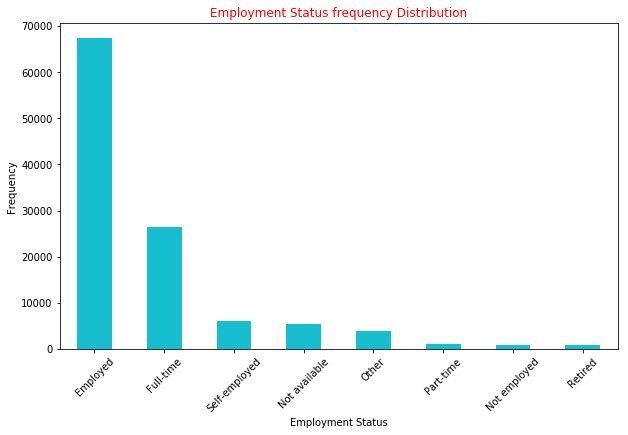

In [18]:
colorChoice = sns.color_palette()[9]
count = df['EmploymentStatus'].value_counts()

plt.figure(figsize=[10, 6])
count.plot(kind='bar', color=colorChoice)
plt.title('Employment Status frequency Distribution', color='red')
plt.ylabel('Frequency')
plt.xlabel('Employment Status')
plt.xticks(rotation=45);

#### Answer: We can see the from the plot that is less likely for unemployed indaviduals to get a loan

### next we look at the  Income Range:

##### How important is borrower income range to prosper?

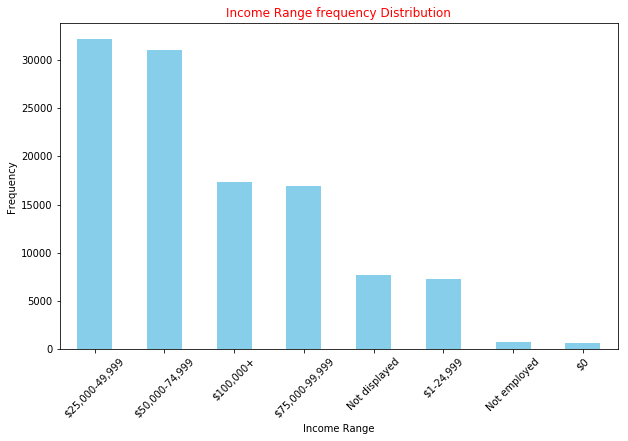

In [19]:
plt.figure(figsize=[10, 6])
income_range_count = df['IncomeRange'].value_counts()
income_range_count.plot(kind='bar',color='skyblue')
plt.title('Income Range frequency Distribution', color='red')
plt.ylabel('Frequency')
plt.xlabel('Income Range')
plt.xticks(rotation=45);

##### Answer: The plot shows that most individuals who have a loan fall in an income bracket of 25k to 75k. However, this plot cannot find any trend related to the amount of income against getting a loan. This plot simply reflectsthe distribution of income range for people who can obtain a loan.

### Loan Status:
##### The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.



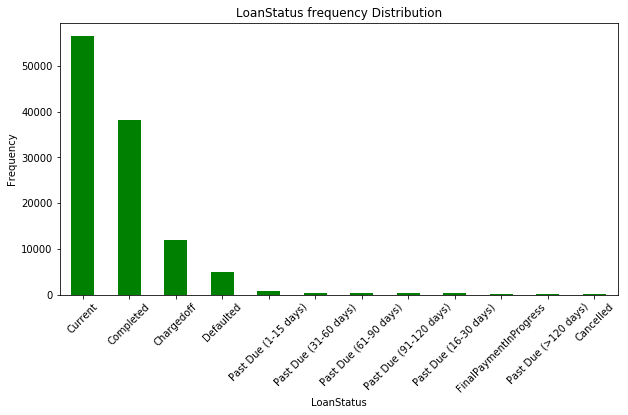

In [20]:
plt.figure(figsize=[10, 5])
loan_status_count = df['LoanStatus'].value_counts()

loan_status_count.plot(kind='bar',color='green')
plt.title('LoanStatus frequency Distribution')
plt.ylabel('Frequency')
plt.xlabel('LoanStatus')
plt.xticks(rotation=45);

#### Answer:
##### The plot shows that more than 50,000 individuals has a loan with Prosper, and quite a large number have completed the loan. The number of past due and cancelled are quite low.

#### Prosper Score:

##### What is the distribution of Prosper score for people who has a loan?

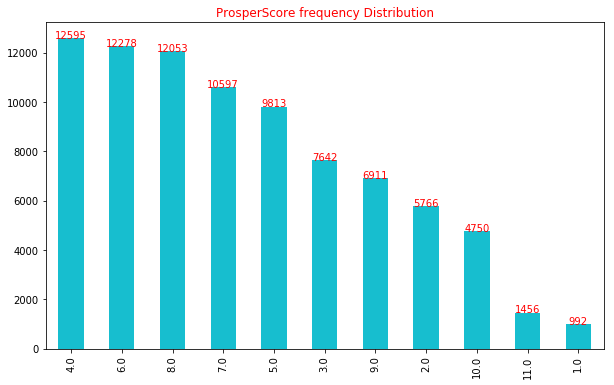

In [21]:
plt.figure(figsize=[10, 6])
cat_counts = df['ProsperScore'].value_counts()

cat_counts.plot(kind='bar', color=colorChoice)
plt.title('ProsperScore frequency Distribution', color='red')

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha='center', color='red')

#### Answer:
##### Most people have a score ranging from 3.0 to 9.0. We can also see that Score 4.0, 6.0 and 8.0 are among the highest frequencies.


### Borrower APR:
##### What is the borrower's APR for people who has a loan?


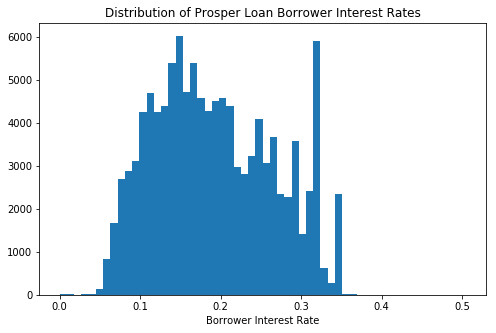

In [22]:
plt.figure(figsize=[8,5])
binsize = 0.0090
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.hist(x='BorrowerRate', data = df, bins = bins)
plt.title('Distribution of Prosper Loan Borrower Interest Rates')
plt.xlabel('Borrower Interest Rate')
plt.show();

#### Answer:
##### BorrowerAPR in this dataset has many peaks with the highest peak at around 35%.It is safe to say that around 7800 people have paid 35% interest. The borrower's Annual percentage rate for the year on an average out of 84853 records is 22.6%. We also observe that there are some people who pay more than 41% APR.

## Bivariate Exploration
> In this section we will be exploring the relationships between Borrower Rate vs. Employment status & Borrower Rate vs. Income Range


#### Does Prosper factor employment status and income range into the repayment rate ?

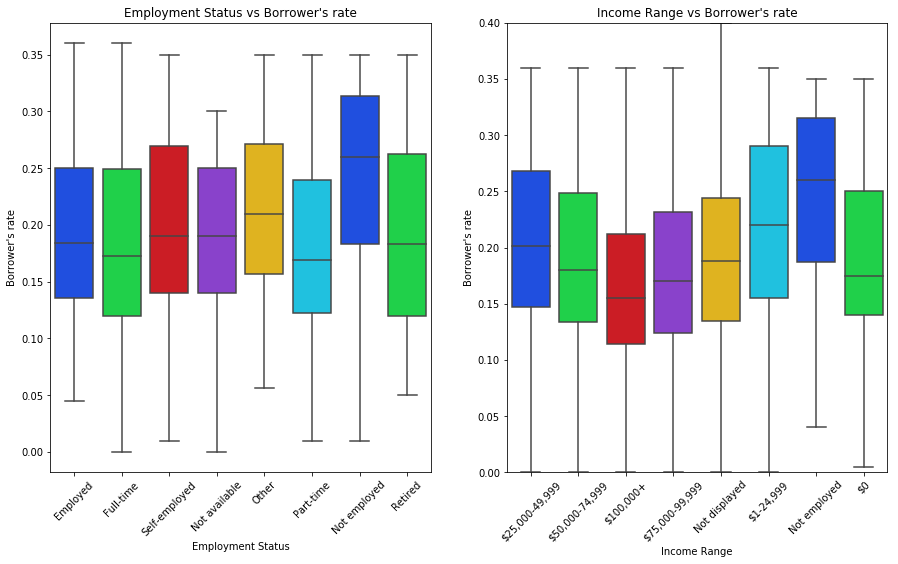

In [23]:
plt.figure(figsize=[15, 8.27])

plt.subplot(1, 2, 1)
sns.boxplot(data=df,
              x='EmploymentStatus',
              y='BorrowerRate',
              palette='bright')

plt.title('Employment Status vs Borrower\'s rate')
plt.ylabel('Borrower\'s rate')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='IncomeRange', y='BorrowerRate',palette='bright')
plt.title('Income Range vs Borrower\'s rate')
plt.ylabel('Borrower\'s rate')
plt.xlabel('Income Range')
plt.xticks(rotation=45)
plt.ylim(0, 0.4);

#### Answer:
##### People who are employed don't necessarily have lower rate. But unemployment does have a higher median rate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that median rate is lower, the higher the income range is. It seems like income range is part of a determining factor for the rate a borrower will get.

#### Comparing occupation against borrower's rate

Does occupation affect a borrower's repayment rate?

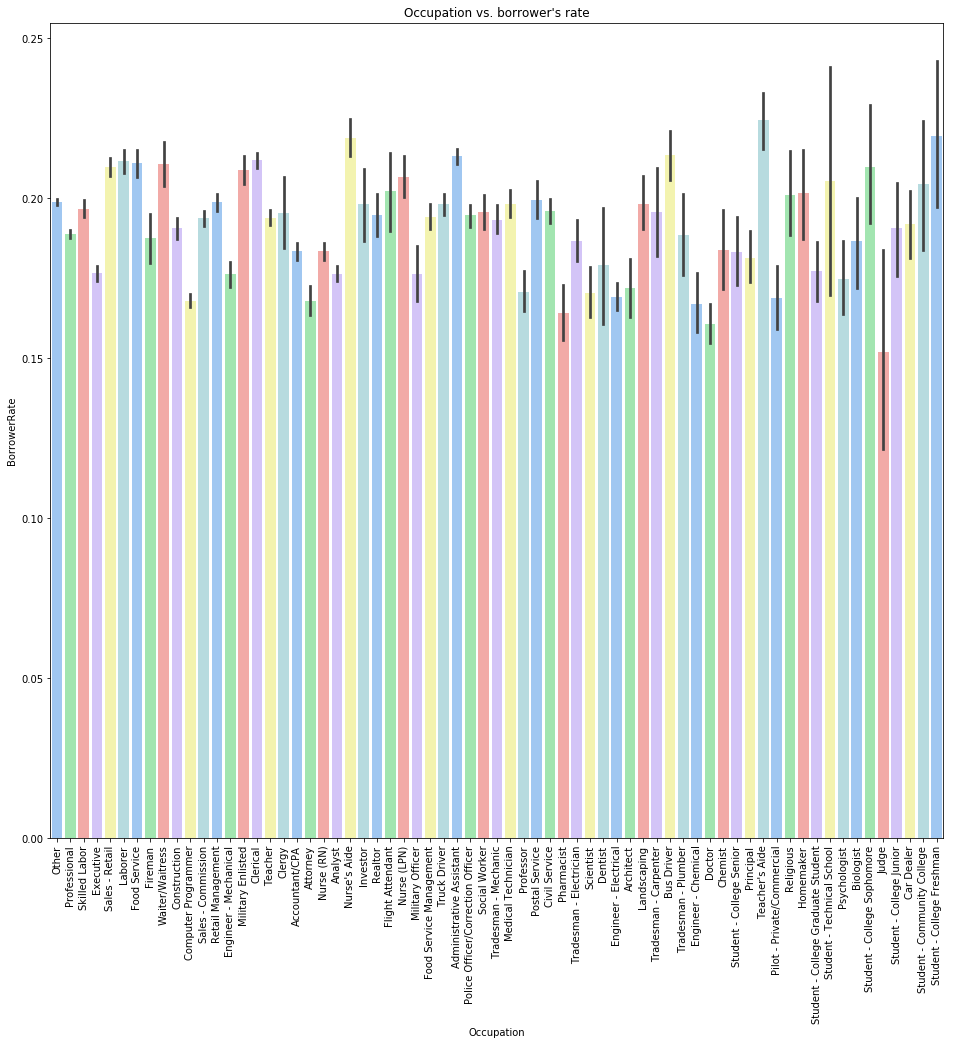

In [24]:
plt.figure(figsize=[16, 15])
sns.barplot(data=df, x='Occupation', y='BorrowerRate', palette="pastel")
plt.xticks(rotation='90')
plt.title('Occupation vs. borrower\'s rate');

#### Answer:
###### The plot shows that it seems like occupation a factor in the borrower's rate. I notice that occupation will lower average salary such as clerical, nurse's aid, bus driver and teacher's aide all have higher median rate. 

###### if we look a bit deeper we can filter this down to the top 10 professions.
>below are the top 10 Occupation from the previous graph - We notice here that administrative Assistant and clerical have the higher median rate, while analyst and computer programmers a have lower median rate.

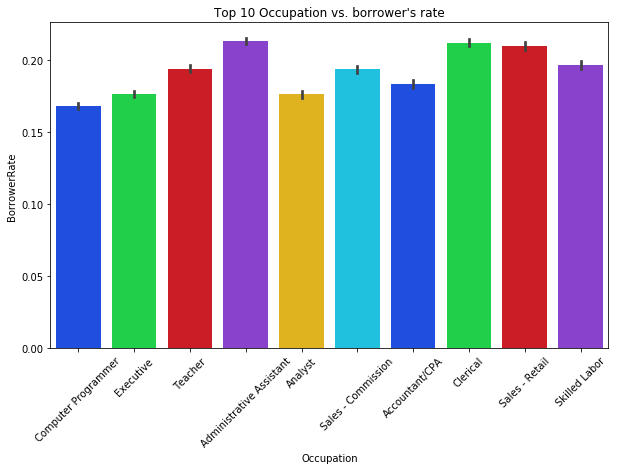

In [25]:
plt.figure(figsize=[10, 6])
top_ten= ['Computer Programmer', 'Executive', 'Teacher', 'Administrative Assistant',
    'Analyst', 'Sales - Commission', 'Accountant/CPA', 'Clerical',
    'Sales - Retail', 'Skilled Labor']

top_occupations = df.loc[df['Occupation'].isin(top_ten)]
ordered = df['Occupation'].value_counts()[:10]
sns.barplot(data=df,
              x='Occupation',
              y='BorrowerRate',
              palette="bright",
              order=top_occupations['Occupation'].value_counts().index)
plt.xticks(rotation='90')
plt.title('Top 10 Occupation vs. borrower\'s rate')
plt.xticks(rotation=45);

### Yearly Borrower Rates

#### What is the yearly borrower rate trends?


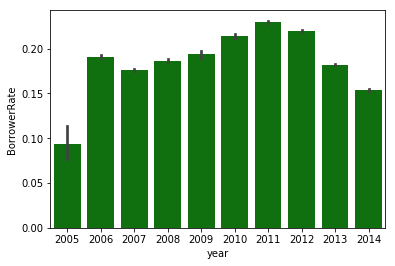

In [26]:
df['year'] = df.ListingCreationDate.str.split('-').str[0]
year_data = df.year.value_counts()

sns.barplot(data=df, x='year', y='BorrowerRate', color='Green');

##### Answer:
###### It is interesting to see that rate goes high up after 2008 until 2011 and since then, the rate is steadily come down until 2014. 

#### Borrower rates vs. ProsperScore

##### Does BorrowerRate have an impact on ProsperScore?

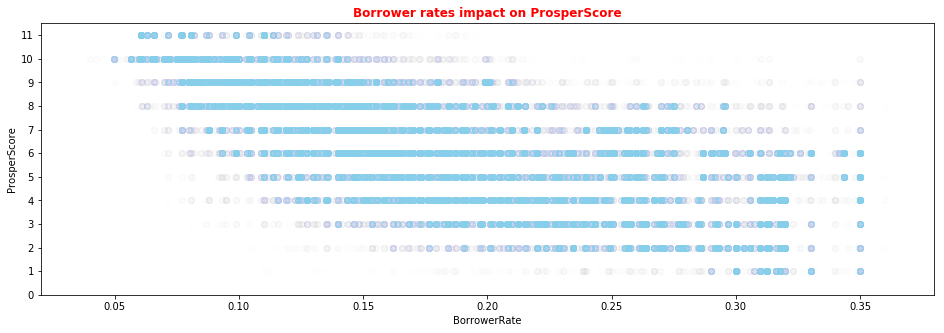

In [27]:
plt.figure(figsize=[16, 5])
plt.scatter(data=df,
            x='BorrowerRate',
            y='ProsperScore',
            color='skyblue',
            alpha=0.007)
plt.yticks(np.arange(0, 12, 1))
plt.title('Borrower rates impact on ProsperScore',
          color='red',
          fontweight='bold',
          fontsize=12)
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore');

#### Answer: 
##### This plot shows a strong indication that the score is a good determinating factor of borrower's rate. We see that the higher the score, the lower the rate.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### comparing yearly Borrower rate and isHomeOwner
##### Does being a homeowner affect borrower rate?

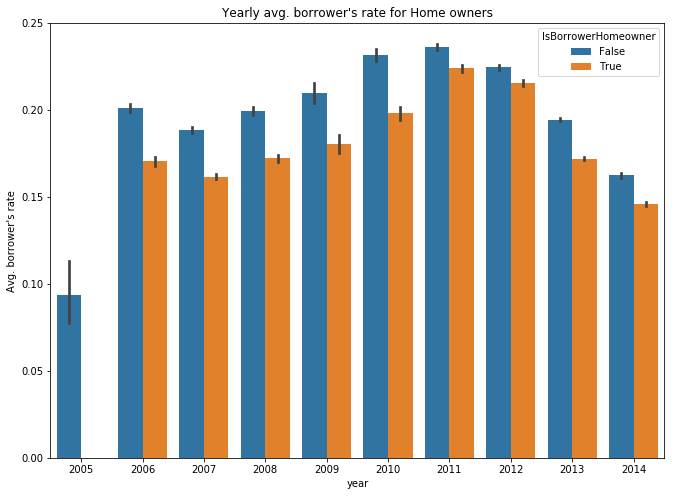

In [28]:
plt.figure(figsize=[11, 8])
sns.barplot(data=df,
           x='year',
           y='BorrowerRate',
           hue='IsBorrowerHomeowner')
plt.ylabel('Avg. borrower\'s rate')
plt.title('Yearly avg. borrower\'s rate for Home owners');

#### Answer:

##### According to the plot, it does seem like homeowners have a slightly lower rate than that of non-homeowners. this is logical as an assest such as property can be leveraged therefore decresing the borrowing risk.

### Year borrower's rate vs. ProsperScore vs. isHomeOwner

##### Does yearly prosperScore and homeowner affect borrower's rate?

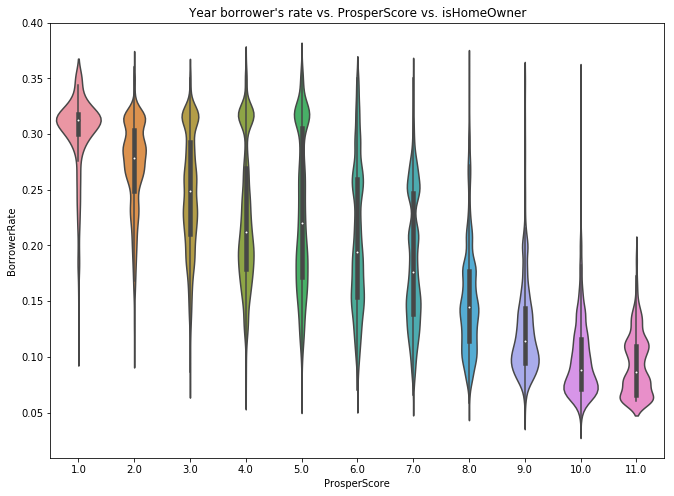

In [29]:
plt.figure(figsize=[11, 8])
sns.violinplot(data=df,
           x='ProsperScore',
           y='BorrowerRate')
plt.title('Year borrower\'s rate vs. ProsperScore vs. isHomeOwner');

#### Answer:
###### The trend here is similar to the previous graph. we can see that for scores 5 and up, homeowners have lower rate, and for scores 5 and lower, homeowners have similar or higher borrowing rate.

### Borrower's rate vs. ProsperScore vs. IncomeRange

#### Does Income range and prosperscore affect borrower's rate?

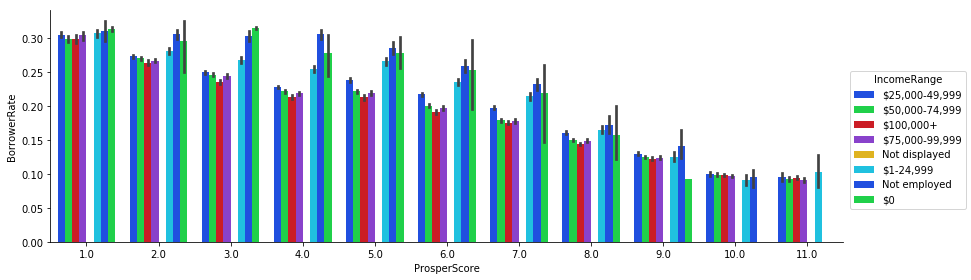

In [30]:
g = sns.factorplot('ProsperScore',
                   'BorrowerRate',
                   'IncomeRange',
                   data=df,
                   kind='bar',
                   aspect=3,
                   palette='bright')

#### Answer:
#### This plot gives a clear indication that the higher the income, the lower the rate will be. As for those unemployed, the rate will be signficantly higher than those who are employed. 
>Unemployed would pose a greater borrowing risk therefore a higher repayment would be expected.

>below we have a filtered view of the above comparison between borrower's rate vs. ProsperScore vs. IncomeRange.

>>This graph shows similar insights as the previous one, except this one is more readable and easier to interpret.

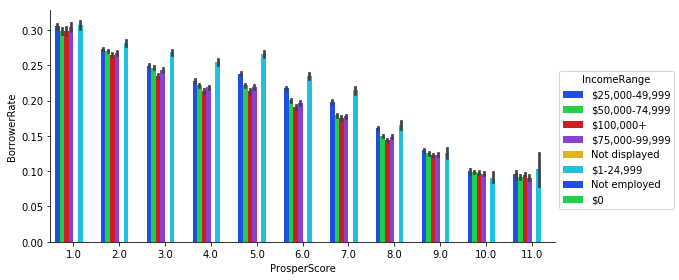

In [31]:
new_income = [
    '$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
    '$1-24,999'
]
income_df = df.loc[df['IncomeRange'].isin(new_income)]


g = sns.factorplot('ProsperScore',
                   'BorrowerRate',
                   'IncomeRange',
                   data= income_df,
                   kind='bar',
                   aspect=2,
                   palette='bright')

## Conclusions
>from the exploration of this dataset we were able to derive valuable information regarding the different factors which influences the repayment rate of Prosper lenders. 

>>Some of the observations we made tells us that home owners have a better chance at securing a loan with Prosper Loans. However this does not mean that non-homeowners will be rejected, other factors that influence the descision on whether Posper approves a loan or not plays a crutial role in the approval process. factors such as emplyoment status of the borrower, income brackets and "Prosper Scores".

Enviroment Limitations: unable to create more advanced visuals such as "Boxen" and "Strip"

In [1]:
!jupyter nbconvert "Part_II_slide_deck" --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 478, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_filename, resources, input_buffer=input_buffer)
  Fil